Shapefiles
You can visualize point data on a map more effectively if you plot meaningful regions to give context to the points. One way to do this is with a shapefile. A shapefile stores a geometry field that is used to draw a map. There are three basic kinds of geometry: point (a single longitude/latitude pair), line (two or more longitude/latitude pairs that can be connected to form a continuous segment) and polygon (made up of three or more longitude/latitude pairs that are joined in a specified order to create an enclosed region).

Geospatial data in vector format are often stored in a shapefile format. 

Because the structure of points, lines, and polygons are different, each individual shapefile can only contain one vector type (all points, all lines or all polygons). 

You will not find a mixture of point, line and polygon objects in a single shapefile.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


BELOW IS A SHAPEFILE THAT IS IMPORTED AS GEDATAFRAME...HE WE HAVE SHAPES OF EACH COUNTRY MADE IN GEOMETRY...HENCE WE USE THAT WITH PLOT TO DRAW SHAPE

In [24]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


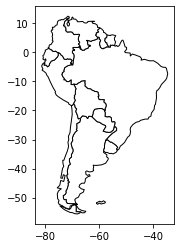

In [25]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

<AxesSubplot:>

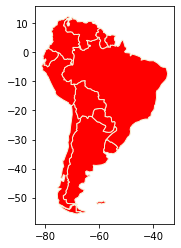

In [26]:
 world[world.continent == 'South America'].plot(
    color='red', edgecolor='beige')

<AxesSubplot:>

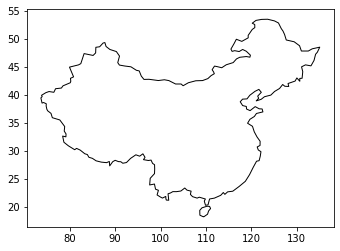

In [27]:
 world[world.name == 'China'].plot(
    color='white', edgecolor='black')

The advantage of GeoJSON over shapefiles is:


The file is human readable, so you can open it in a text editor and understand the contents.


The file stands alone and doesn't rely on other files.


GeoJSON supports multi-part geometries.



PLOTTING SCATTERRED POINTS INSIDE THE SHAPES

In [31]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
######WE PLOT IT INSIDE SOUTH AMERICA

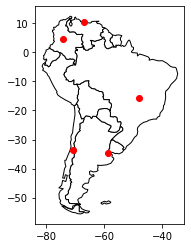

In [33]:
# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')                        # we can use simply gdf

plt.show()

#### READING GEOJSON & TEXT FILES AS GEODATAFRAME

WE MAY HAVE TEXT FILES AND WE NEED TO CONVERT THAT INTO JSON OR GEODATAFRAME,, or WE CAN JUST DIRECTLY READ THEM

In [18]:
import geopandas as gpd

school = gpd.read_file('C:/Users/ANTHONY/Desktop/CSV&XLSX/school_districts_geojson.txt')
school

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."
5,Mary,Nashville,37215,mary@pierceforschools.org,TN,Pierce,4329 Wallace Lane,Member,2018,8,615-310-9772,"MULTIPOLYGON (((-86.80849 36.14744, -86.80863 ..."
6,Christine,Nashville,37203,cbuggs@mnps.org,TN,Buggs,425 Fisk Street,Member,2016,5,615-525-5371,"MULTIPOLYGON (((-86.69728 36.20414, -86.69696 ..."
7,Tyese,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068,"MULTIPOLYGON (((-86.70559 36.09685, -86.70306 ..."
8,Will,Nashville,37204,will@pinkstonforschools.com,TN,Pinkston,937 Battlefield Drive,Member,2016,7,615-298-5787,"MULTIPOLYGON (((-86.55811 36.13984, -86.55812 ..."


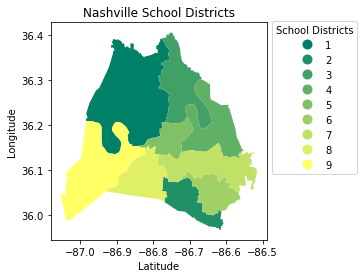

In [19]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the summer colormap (sequential)
school.plot(column = 'district', cmap = 'summer', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show()

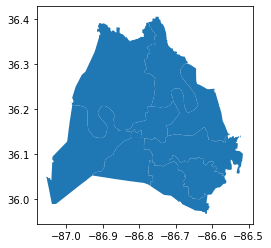

In [20]:
school.plot()
plt.show()

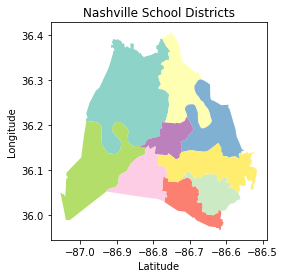

In [21]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument....THIS WILL AUTOMATICALLY COME INTO THIS
school.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)              
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

In [16]:
import geopandas as gpd

council = gpd.read_file('C:/Users/ANTHONY/Desktop/CSV&XLSX/council_districts.geojson')
council

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ..."
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
5,Scott,scott.davis@nashville.gov,615-554-9730,615-862-6780,Davis,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."
6,Brett,brett.withers@nashville.gov,615-427-5946,615-862-6780,Withers,Council Member,6,"MULTIPOLYGON (((-86.69743 36.20060, -86.69761 ..."
7,Anthony,anthony.davis@nashville.gov,615-775-8746,615-862-6780,Davis,Council Member,7,"MULTIPOLYGON (((-86.71024 36.25584, -86.70973 ..."
8,Brenda,brenda.hayes@nashville.gov,615-473-8339,615-862-6780,Haywood,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
9,Doug,doug.pardue@nashville.gov,615-859-9370,615-305-3945,Pardue,Council Member,10,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."


SPATIAL JOINS

These polygon plots show the 35 council districts on the left and the 9 school districts on the right. We want to know if any council districts are contained completely within a school district? And if any council districts intersects with any school districts? Geopandas has a spatial join method called sjoin() that will help us find out.

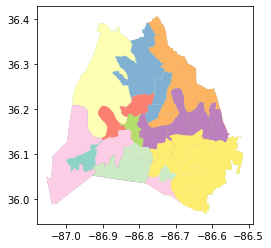

(100, 20)


In [36]:
############### WRONG..................

# Spatially join art_geo and neighborhoods
art_intersect_neighborhoods = gpd.sjoin(council, school, op = 'intersects')


art_intersect_neighborhoods.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.show()
print(art_intersect_neighborhoods.shape)

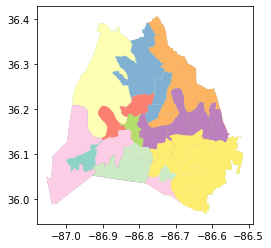

(100, 20)


In [39]:

# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods 
art_within_neighborhoods = gpd.sjoin(council, school, op = 'intersects')

art_within_neighborhoods.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.show()

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

PLOTTING SCATTERRED POINTS INSIDE THE SHAPES method_______using S.JOIN

questions: how many council districts are completely contained in a school district and how many council_district-school_district intersections exist,

In [10]:
import geopandas as gpd

df = gpd.read_file('C:/Users/ANTHONY/Desktop/CSV&XLSX/neighborhoods_geojson.txt')
df

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."
...,...,...
283,River Plantation III,"MULTIPOLYGON (((-86.94600 36.06871, -86.94605 ..."
284,Porter Heights,"MULTIPOLYGON (((-86.70929 36.18842, -86.70942 ..."
285,Avondale Park,"MULTIPOLYGON (((-86.98693 36.07718, -86.98672 ..."
286,Travis Trace,"MULTIPOLYGON (((-87.01880 36.08394, -87.01866 ..."


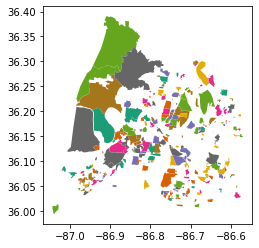

In [11]:

# Plot the neighborhoods, color according to name and use the Dark2 colormap
df.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

## CONVERSION TO GEODATAFRAME

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
add1="C:/Users/ANTHONY/Desktop/CSV&XLSX/schools_csv_geopandas_lat_long.csv"
df=pd.read_csv(add1)
df


,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,770,West End Middle,3529 West End Avenue,Nashville,TN,37205,(615)298-8425,690,Middle School,Grade 5,Grade 8,36.131975,-86.824323,http://schools.mnps.org/west-end-middle-prep,Hillsboro,"(36.13197471, -86.82432265)"
166,775,Westmeade Elementary,6641 Clearbrook Drive,Nashville,TN,37205,(615)353-2066,695,Elementary School,Grade K,Grade 4,36.091997,-86.894137,http://schools.mnps.org/westmeade-elementary-s...,Hillwood,"(36.09199678, -86.89413665)"
167,787,Whites Creek High School,7277 Old Hickory Blvd.,Whites Creek,TN,37189,(615)876-5132,704,High School,Grade 9,Grade 12,36.276645,-86.818833,http://schools.mnps.org/whites-creek-high-school,Whites Creek,"(36.27664532, -86.81883299)"
168,612,William Henry Oliver Middle,6211 Nolensville Rd.,Nashville,TN,37211,(615)332-3011,538,Middle School,Grade 5,Grade 8,36.020174,-86.712207,http://schools.mnps.org/oliver-middle-prep,John Overton,"(36.02017398, -86.7122071)"


In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]            #always rememebr 1st longitude and then latitude
gdf = GeoDataFrame(df, geometry=geometry)
gdf.crs = {'init': 'epsg:4326'}                       #epsg:3786 will make it into metres..........
gdf


C:\Users\ANTHONY\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65885 36.02182)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.83223 36.25296)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383 36.27377)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-86.62377 36.23158)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-86.59942 36.04667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,770,West End Middle,3529 West End Avenue,Nashville,TN,37205,(615)298-8425,690,Middle School,Grade 5,Grade 8,36.131975,-86.824323,http://schools.mnps.org/west-end-middle-prep,Hillsboro,"(36.13197471, -86.82432265)",POINT (-86.82432 36.13197)
166,775,Westmeade Elementary,6641 Clearbrook Drive,Nashville,TN,37205,(615)353-2066,695,Elementary School,Grade K,Grade 4,36.091997,-86.894137,http://schools.mnps.org/westmeade-elementary-s...,Hillwood,"(36.09199678, -86.89413665)",POINT (-86.89414 36.09200)
167,787,Whites Creek High School,7277 Old Hickory Blvd.,Whites Creek,TN,37189,(615)876-5132,704,High School,Grade 9,Grade 12,36.276645,-86.818833,http://schools.mnps.org/whites-creek-high-school,Whites Creek,"(36.27664532, -86.81883299)",POINT (-86.81883 36.27665)
168,612,William Henry Oliver Middle,6211 Nolensville Rd.,Nashville,TN,37211,(615)332-3011,538,Middle School,Grade 5,Grade 8,36.020174,-86.712207,http://schools.mnps.org/oliver-middle-prep,John Overton,"(36.02017398, -86.7122071)",POINT (-86.71221 36.02017)


###### ANOTHER METHOD

In [14]:
import geopandas
from geopandas import GeoDataFrame
gdf1 = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf1

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location,geometry
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)",POINT (-86.65885 36.02182)
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)",POINT (-86.83223 36.25296)
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)",POINT (-86.70383 36.27377)
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)",POINT (-86.62377 36.23158)
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)",POINT (-86.59942 36.04667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,770,West End Middle,3529 West End Avenue,Nashville,TN,37205,(615)298-8425,690,Middle School,Grade 5,Grade 8,36.131975,-86.824323,http://schools.mnps.org/west-end-middle-prep,Hillsboro,"(36.13197471, -86.82432265)",POINT (-86.82432 36.13197)
166,775,Westmeade Elementary,6641 Clearbrook Drive,Nashville,TN,37205,(615)353-2066,695,Elementary School,Grade K,Grade 4,36.091997,-86.894137,http://schools.mnps.org/westmeade-elementary-s...,Hillwood,"(36.09199678, -86.89413665)",POINT (-86.89414 36.09200)
167,787,Whites Creek High School,7277 Old Hickory Blvd.,Whites Creek,TN,37189,(615)876-5132,704,High School,Grade 9,Grade 12,36.276645,-86.818833,http://schools.mnps.org/whites-creek-high-school,Whites Creek,"(36.27664532, -86.81883299)",POINT (-86.81883 36.27665)
168,612,William Henry Oliver Middle,6211 Nolensville Rd.,Nashville,TN,37211,(615)332-3011,538,Middle School,Grade 5,Grade 8,36.020174,-86.712207,http://schools.mnps.org/oliver-middle-prep,John Overton,"(36.02017398, -86.7122071)",POINT (-86.71221 36.02017)


#### FINDING AREA OF GEJSON/SHAPEFILES

In [77]:
#########its not the schools above ,its of school district

# Print the head of the urban polygon 
#print(school.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
school_3857 = school.to_crs(epsg = 3857)
#print(school_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = school_3857.geometry.area / 10**6
print('The area of the school districts is\n ', area,'  km squared')

The area of the school districts is
  0    563.134380
1    218.369949
2    127.615396
3    216.871511
4    353.232132
5    164.137548
6     98.469632
7    119.742279
8    230.135653
dtype: float64   km squared


In [78]:
school['area'] = school.geometry.area
school

<ipython-input-78-eb30adedfab8>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  school['area'] = school.geometry.area


,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry,Center_point,lat,long,area
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...",POINT (-86.86087 36.26282),-86.860866,36.262822,0.036641
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ...",POINT (-86.72361 36.28516),-86.723614,36.285155,0.014205
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ...",POINT (-86.70156 36.03021),-86.701564,36.030212,0.008328
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ...",POINT (-86.63964 36.19697),-86.639644,36.196967,0.014123
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ...",POINT (-86.95428 36.10392),-86.954284,36.103924,0.023030
5,Mary,Nashville,37215,mary@pierceforschools.org,TN,Pierce,4329 Wallace Lane,Member,2018,8,615-310-9772,"MULTIPOLYGON (((-86.80849 36.14744, -86.80863 ...",POINT (-86.82739 36.08342),-86.827388,36.083420,0.010704
6,Christine,Nashville,37203,cbuggs@mnps.org,TN,Buggs,425 Fisk Street,Member,2016,5,615-525-5371,"MULTIPOLYGON (((-86.69728 36.20414, -86.69696 ...",POINT (-86.75215 36.16995),-86.752147,36.169955,0.006415
7,Tyese,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068,"MULTIPOLYGON (((-86.70559 36.09685, -86.70306 ...",POINT (-86.63366 36.04946),-86.633663,36.049457,0.007813
8,Will,Nashville,37204,will@pinkstonforschools.com,TN,Pinkston,937 Battlefield Drive,Member,2016,7,615-298-5787,"MULTIPOLYGON (((-86.55811 36.13984, -86.55812 ...",POINT (-86.64296 36.10810),-86.642959,36.108097,0.015004


####  CENTROID   OF   GEJSON/SHAPEFILES

In [69]:
school['Center_point'] = school['geometry'].centroid
#Extract lat and lon from the centerpoint
school["lat"] = school.Center_point.map(lambda p: p.x)
school["long"] = school.Center_point.map(lambda p: p.y)

school

<ipython-input-69-e58f383697c6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  school['Center_point'] = school['geometry'].centroid


,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry,Center_point,lat,long
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...",POINT (-86.86087 36.26282),-86.860866,36.262822
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ...",POINT (-86.72361 36.28516),-86.723614,36.285155
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ...",POINT (-86.70156 36.03021),-86.701564,36.030212
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ...",POINT (-86.63964 36.19697),-86.639644,36.196967
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ...",POINT (-86.95428 36.10392),-86.954284,36.103924
5,Mary,Nashville,37215,mary@pierceforschools.org,TN,Pierce,4329 Wallace Lane,Member,2018,8,615-310-9772,"MULTIPOLYGON (((-86.80849 36.14744, -86.80863 ...",POINT (-86.82739 36.08342),-86.827388,36.083420
6,Christine,Nashville,37203,cbuggs@mnps.org,TN,Buggs,425 Fisk Street,Member,2016,5,615-525-5371,"MULTIPOLYGON (((-86.69728 36.20414, -86.69696 ...",POINT (-86.75215 36.16995),-86.752147,36.169955
7,Tyese,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068,"MULTIPOLYGON (((-86.70559 36.09685, -86.70306 ...",POINT (-86.63366 36.04946),-86.633663,36.049457
8,Will,Nashville,37204,will@pinkstonforschools.com,TN,Pinkston,937 Battlefield Drive,Member,2016,7,615-298-5787,"MULTIPOLYGON (((-86.55811 36.13984, -86.55812 ...",POINT (-86.64296 36.10810),-86.642959,36.108097


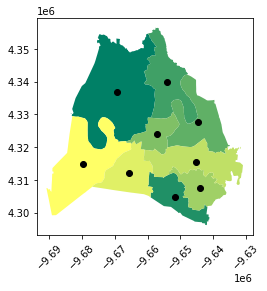

In [61]:
############  TO GET      AREA OR PLOT CENTROID  ON MAP       WE NEED TO CONVERT IT INTO CRS. ELSE NOT REQUIRED #####################

# Create downtown_center from urban_poly_3857
district_center = school_3857.geometry.centroid


# Plot the urban_poly_3857 as ax and add the center point
ax = school_3857.plot(column = 'district',cmap = 'summer')
district_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

##### also find distacne from one point to other

In [ ]:
############distance

#### DRAW NEIGHBOUR OF POLYGON USING FOLIUM

In [76]:
import folium 

# Create array for called folium_loc from the urban_polygon center point
point = school.Center_point[0]
folium_loc = [point.y, point.x]
print(folium_loc)

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 10)

# Draw our neighborhood: SCHOOL DISTRICT
folium.GeoJson(school.geometry[0]).add_to(downtown_map)

# Display the map
display(downtown_map)

[36.262822181189904, -86.86086595994405]
